In [49]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [50]:
model=tf.keras.models.load_model('/Users/withmocha/Desktop/VisualStudioCode/Capstone Design project/sentence base/model/saved model/0408/best_model.h5')

2024-04-08 23:54:26.649916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-08 23:54:26.652510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-08 23:54:26.653639: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 382, 64)           256       
                                                                 
 batch_normalization (BatchN  (None, 382, 64)          256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 191, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 189, 128)          24704     
                                                                 
 batch_normalization_1 (Batc  (None, 189, 128)         512       
 hNormalization)                                                 
                                                        

In [52]:
data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/model train & test data(0408)/train_data_after_vector(0408).csv")
data_row.drop(columns=['Unnamed: 0'],inplace=True)
data_row.drop(columns=['predict'],inplace=True)
x_train=pd.DataFrame(data_row)

In [53]:
import pandas as pd

x_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/target/after vector/test data/x_target.csv")
y_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/target/after vector/test data/y_target.csv")

x_test.drop(columns=['Unnamed: 0'],inplace=True)
y_test.drop(columns=['Unnamed: 0'],inplace=True)

In [54]:
y_test

,predict
0,1
1,1
2,0
3,0
4,1
...,...
1190,1
1191,1
1192,0
1193,0


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # test set에는 transform만 사용하기

In [56]:
x_test.shape

(1195, 384)

In [57]:
x_test = tf.cast(x_test, tf.float32)

In [58]:
x_test = tf.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [59]:
x_test

<tf.Tensor: shape=(1195, 384, 1), dtype=float32, numpy=
array([[[0.56939167],
        [0.30354252],
        [0.6891929 ],
        ...,
        [0.41374114],
        [0.4484568 ],
        [0.6071867 ]],

       [[0.56001425],
        [0.44883436],
        [0.5627025 ],
        ...,
        [0.52650106],
        [0.33586612],
        [0.5874779 ]],

       [[0.60217243],
        [0.3772612 ],
        [0.5217177 ],
        ...,
        [0.5358767 ],
        [0.32755366],
        [0.5290639 ]],

       ...,

       [[0.57927763],
        [0.3387698 ],
        [0.6578794 ],
        ...,
        [0.50161225],
        [0.35549295],
        [0.491177  ]],

       [[0.5921111 ],
        [0.36182323],
        [0.66998905],
        ...,
        [0.58884263],
        [0.33200124],
        [0.48485148]],

       [[0.42699456],
        [0.48409778],
        [0.63885987],
        ...,
        [0.6173398 ],
        [0.33322024],
        [0.53934807]]], dtype=float32)>

In [60]:
pred = model.predict(x_test)

2024-04-08 23:54:29.532581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-08 23:54:29.534308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-08 23:54:29.534919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 [==============================] - 1s 16ms/step


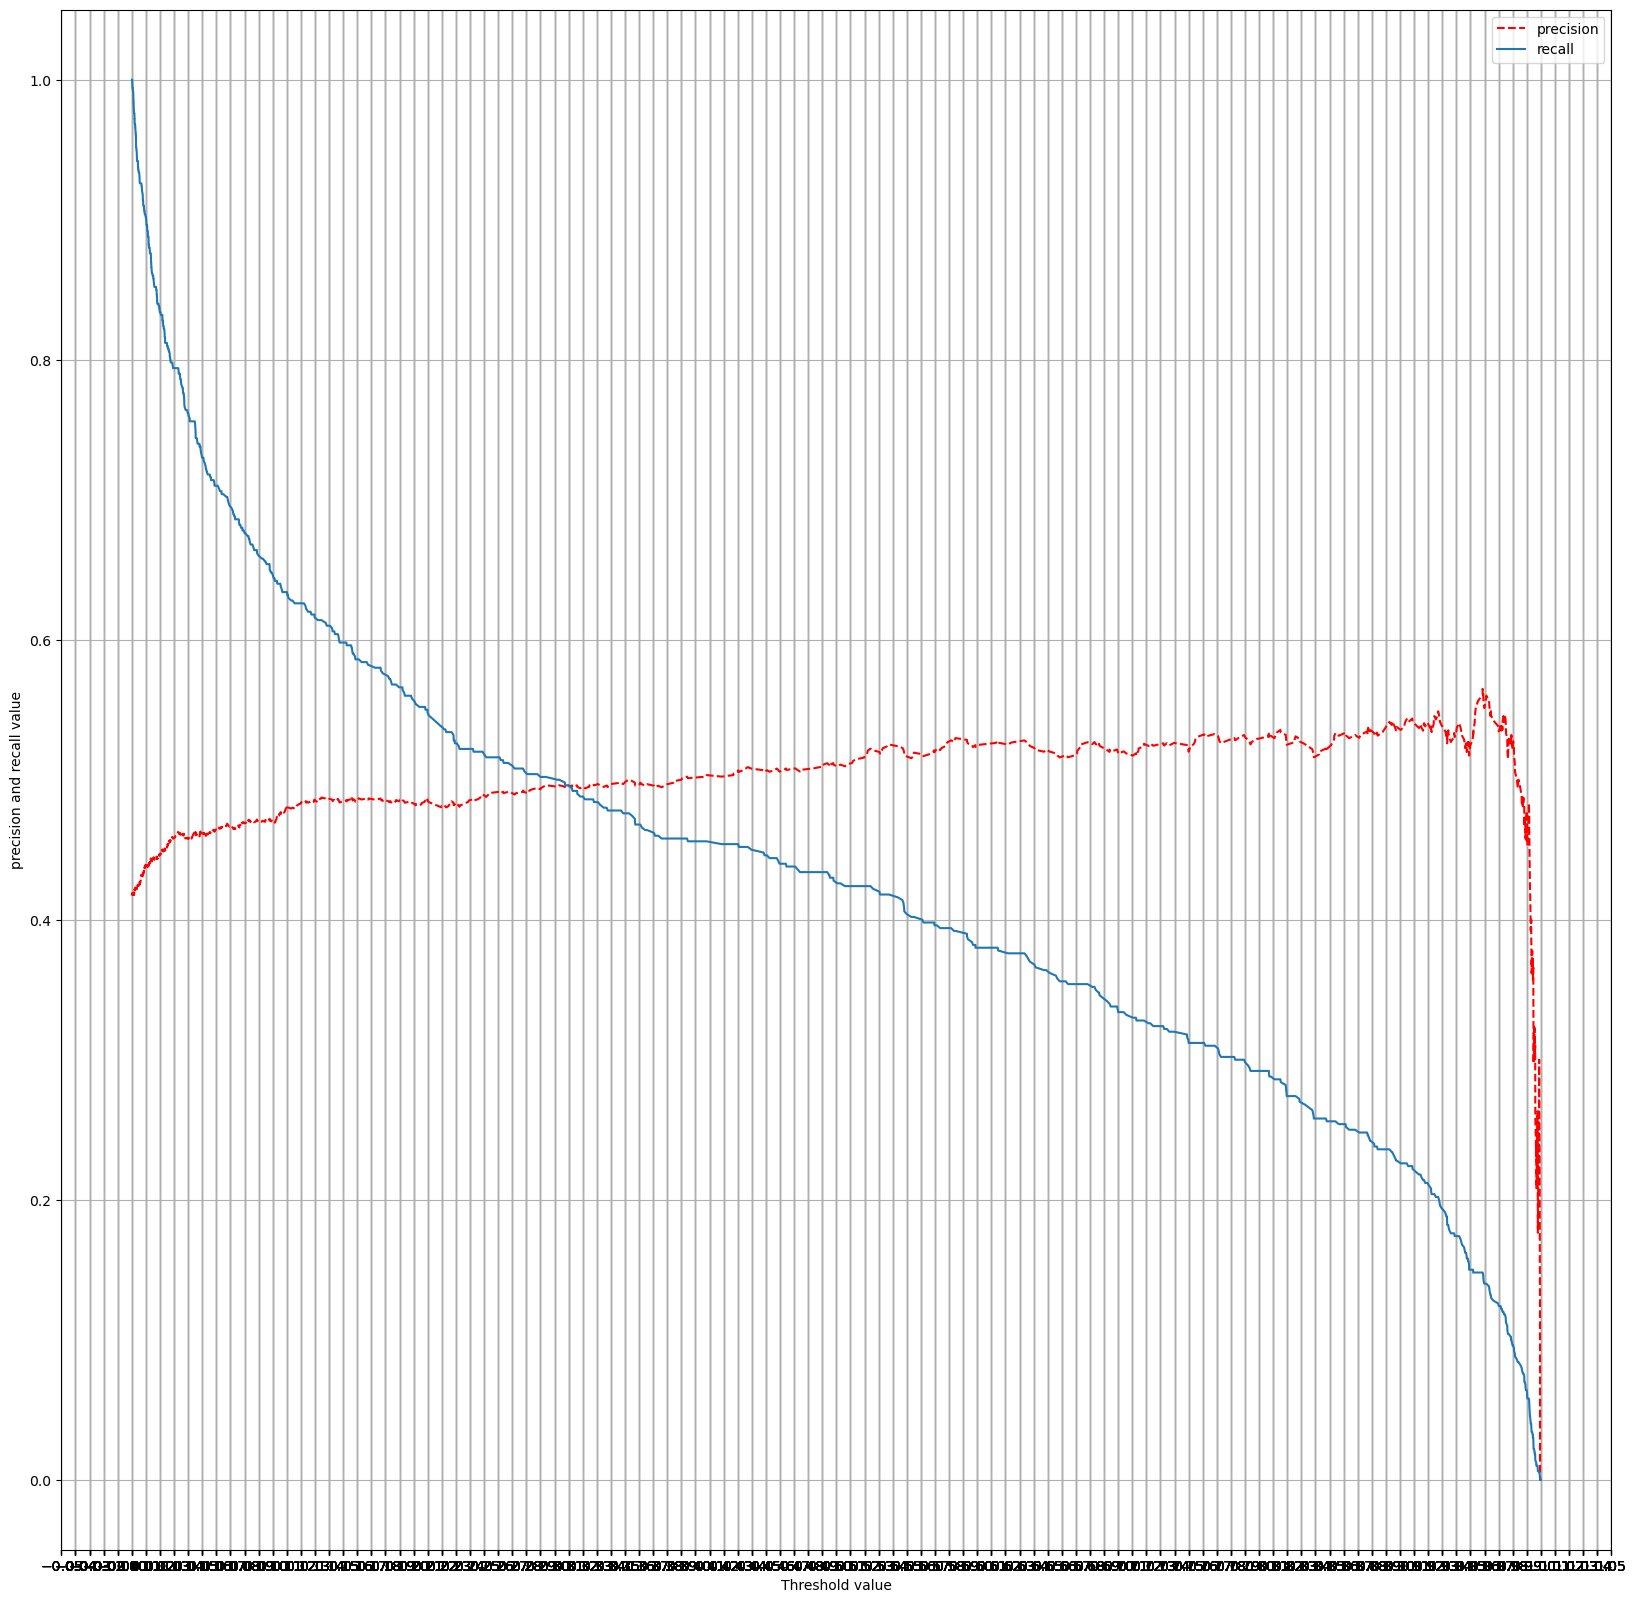

In [61]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def precision_recall_curve_plot(y_test,pred):
    precisions, recalls,thresholds = precision_recall_curve(y_test,pred)
    
    plt.figure(figsize=(20,20))
    threshold_index = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_index],'r--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_index],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.around(np.arange(start,end,0.001),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('precision and recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,pred)

In [62]:
precisions, recalls,thresholds = precision_recall_curve(y_test,pred)

for i in range(len(precisions)):
    if recalls[i]<=precisions[i]:
        thresholds_fit=thresholds[i]
        break
    
print(i)

692


In [63]:
thresholds_fit

0.3097061

In [64]:
pred

array([[0.21989746],
       [0.5933677 ],
       [0.00776919],
       ...,
       [0.57362336],
       [0.06280328],
       [0.0137294 ]], dtype=float32)

In [65]:
thresholds_fit

0.3097061

In [66]:
y_pred=pred.reshape(-1)
y_pred

array([0.21989746, 0.5933677 , 0.00776919, ..., 0.57362336, 0.06280328,
       0.0137294 ], dtype=float32)

In [67]:
y_pred=pred.reshape(-1)
threshold = thresholds_fit
pred = (y_pred >= threshold)

In [68]:
pred

array([False,  True, False, ...,  True, False, False])

In [69]:
import numpy as np

y_test=np.array(y_test['predict'])


In [70]:
y_test

array([1, 1, 0, ..., 0, 0, 1])

In [71]:
from sklearn.metrics import accuracy_score

accuracy_test= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test}')

Accuracy: 0.5782426778242677
